In [1]:
import numpy as np
import h5py
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButton
import matplotlib.pyplot as plt
import torch
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

## Explore image data

In [2]:
#image_path = './dataset/CKD_01/T2.nii.gz'
#image_obj = nib.load(image_path)
#print(f'Type of the image {type(image_obj)}')

# Extract data as numpy array
#image_data = image_obj.get_fdata()
#type(image_data)

h5f = h5py.File('./dataset/T2train.h5','r')
X1 = torch.from_numpy(h5f['T2data_3'][:])
X1.shape

torch.Size([1, 14, 240, 240])

In [3]:
# Get the image shape
#height, width, depth = image_data.shape
channel, depth, width, height = X1.shape
print(f"Image channel : {channel}")
print(f"Image depth : {depth}")
print(f"Image width : {width}")
print(f"Image height : {height}")

Image channel : 1
Image depth : 14
Image width : 240
Image height : 240


torch.Size([1, 14, 240, 240])


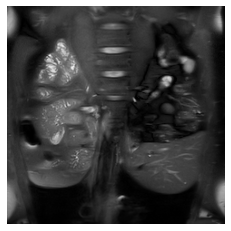

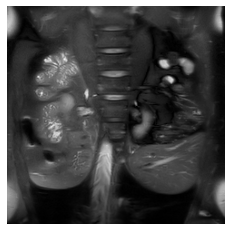

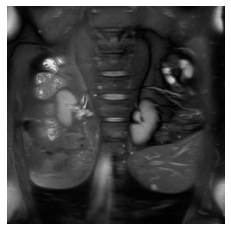

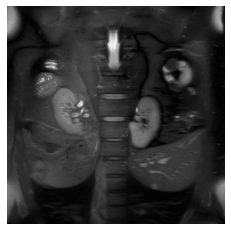

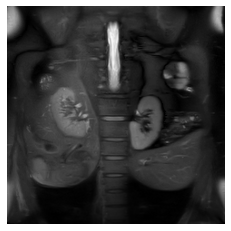

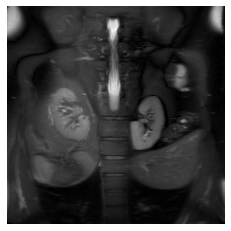

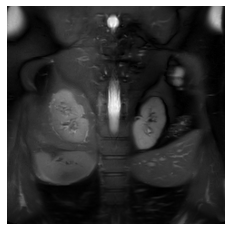

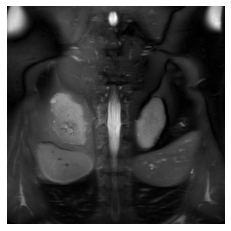

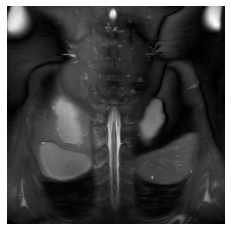

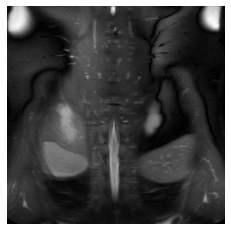

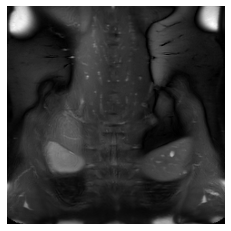

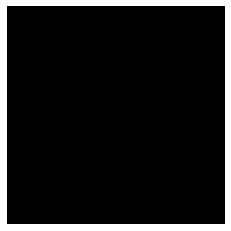

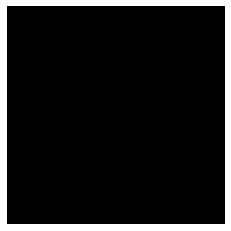

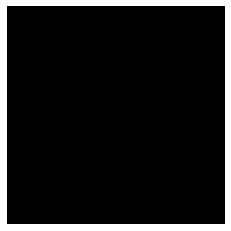

In [4]:
# Visualize Single Image Data
print(X1.shape)
for i in range(depth):
    plt.imshow(X1[0,i,:,:],cmap='gray')
    plt.axis('off')
    plt.show()

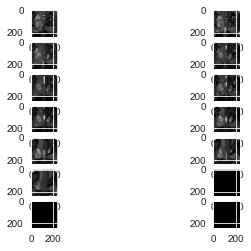

In [5]:
f, axarr = plt.subplots(7,2)
axarr[0,0].imshow(X1[0,0,:,:],cmap='gray')
axarr[0,1].imshow(X1[0,1,:,:],cmap='gray')
axarr[1,0].imshow(X1[0,2,:,:],cmap='gray')
axarr[1,1].imshow(X1[0,3,:,:],cmap='gray')
axarr[2,0].imshow(X1[0,4,:,:],cmap='gray')
axarr[2,1].imshow(X1[0,5,:,:],cmap='gray')
axarr[3,0].imshow(X1[0,6,:,:],cmap='gray')
axarr[3,1].imshow(X1[0,7,:,:],cmap='gray')
axarr[4,0].imshow(X1[0,8,:,:],cmap='gray')
axarr[4,1].imshow(X1[0,9,:,:],cmap='gray')
axarr[5,0].imshow(X1[0,10,:,:],cmap='gray')
axarr[5,1].imshow(X1[0,11,:,:],cmap='gray')
axarr[6,0].imshow(X1[0,12,:,:],cmap='gray')
axarr[6,1].imshow(X1[0,13,:,:],cmap='gray')


In [6]:
def explore_3d_image(layer):

    plt.figure(figsize=(5,10))
    plt.imshow(X1[0,layer,:,:],cmap='gray')
    plt.title('Explore Layers of Kidney MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,X1.shape[1]-1))

interactive(children=(IntSlider(value=6, description='layer', max=13), Output()), _dom_classes=('widget-intera…

<function __main__.explore_3d_image(layer)>

## Explore data labels

In [18]:
""" label_path = './dataset/CKD_01/T2_mask.nii.gz'
label_obj = nib.load(label_path)
type(label_obj)
# Label data as numpy array
label_data = label_obj.get_fdata()
type(label_data) """

h5f = h5py.File('./dataset/T2trainmask.h5','r')
X1mask = torch.from_numpy(h5f['T2maskdata_1'][:])
type(X1mask)

torch.Tensor

In [19]:
# Get the image shape
#height, width, depth = image_data.shape
channel, depth, width, height = X1mask.shape
print(f"Image channel : {channel}")
print(f"Image depth : {depth}")
print(f"Image width : {width}")
print(f"Image height : {height}")


Image channel : 1
Image depth : 14
Image width : 240
Image height : 240


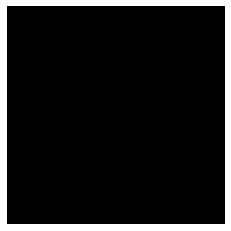

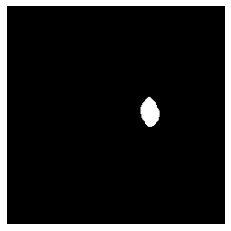

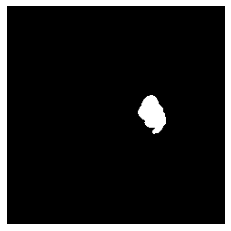

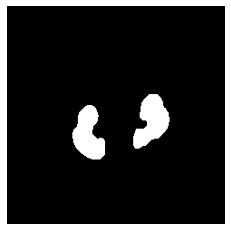

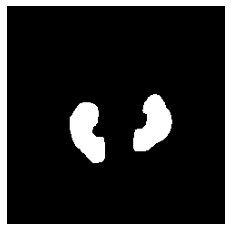

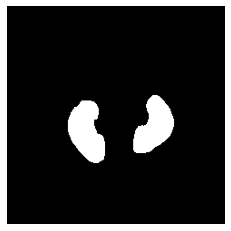

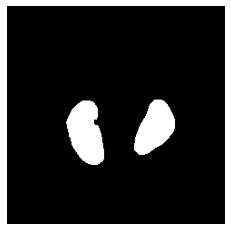

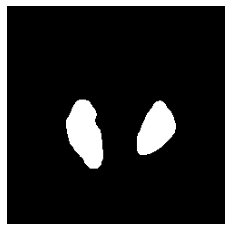

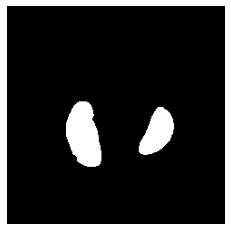

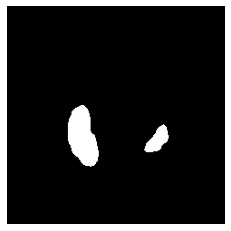

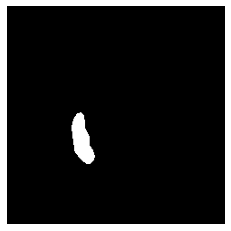

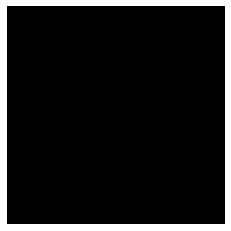

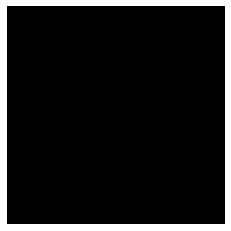

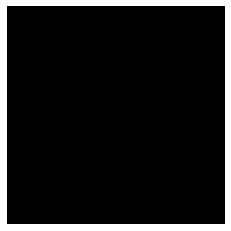

In [20]:
# Visualize Single Image Data

for i in range(depth):
    plt.imshow(X1mask[0,i,:,:],cmap='gray')
    plt.axis('off')
    plt.show()

In [29]:
def explore_3d_image(layer):

    plt.figure(figsize=(5,10))
    plt.imshow(X1mask[0,layer,:,:],cmap='gray')
    plt.title('Explore Layers of Kidney MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,X1mask.shape[1]-1))

interactive(children=(IntSlider(value=6, description='layer', max=13), Output()), _dom_classes=('widget-intera…

<function __main__.explore_3d_image(layer)>

## Mask and Image

In [30]:
def explore_3d_image(layer):
    
    plt.figure(figsize=(5,10))
    plt.imshow(X1[0,layer,:,:],cmap='gray')
    plt.imshow(X1mask[0,layer,:,:], alpha=0.3)
    plt.title('Explore Segmented MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,X1.shape[1]-1))

interactive(children=(IntSlider(value=6, description='layer', max=13), Output()), _dom_classes=('widget-intera…

<function __main__.explore_3d_image(layer)>